# Studies about gravitational waves, glitches on O3 run data - We need be able to obtain data from LIGO, HANFORD and VIRGO interferometers, manipulate this data and plot the results from O3 run.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import datetime
import matplotlib.dates as mdates

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

from astropy.time import Time
# from gwosc.datasets import event_gps
# from gwpy.timeseries import TimeSeries

import frequency_functions as ff

## We can search for data in three ways: i) ifo: **{H1, L1, V1} from LigoDV** website or ii) ifo: **{H1, L1} from Zenodo** website and iii) directly using libraries and functions in python.

## Import and clean the first and second one as follow. Put them with the same column name "label" and filter the "confidence" values to above 0.9

First we'll import the dataFrames from LIGO website (https://ldvw.ligo.caltech.edu/ldvw/gspySearch) and filter some duplicate data from them. Let's leave Hanford aside for now

In [6]:
dfligo_L1_O3a = pd.read_csv("O3run data/L1_O3a_gspyLIGO.csv").drop_duplicates()
dfligo_V1_O3a = pd.read_csv("O3run data/V1_O3a_gspyLIGO.csv").drop_duplicates()
# dfligo_H1_O3a = pd.read_csv("O3run data/H1_O3a_gspyLIGO.csv").drop_duplicates()

dfligo_L1_O3b = pd.read_csv("O3run data/L1_O3b_gspyLIGO.csv").drop_duplicates()
dfligo_V1_O3b = pd.read_csv("O3run data/V1_O3b_gspyLIGO.csv").drop_duplicates()
# dfligo_H1_O3b = pd.read_csv("O3run data/H1_O3b_gspyLIGO.csv").drop_duplicates()

Now for the ZENODO website (https://zenodo.org/records/5649212) data

In [8]:
dfzenodo_L1_O3a = pd.read_csv("O3run data/L1_O3a_Zenodo.csv").drop_duplicates()
# dfzenodo_H1_O3a = pd.read_csv("O3run data/H1_O3a_Zenodo.csv.csv").drop_duplicates()

dfzenodo_L1_O3b = pd.read_csv("O3run data/L1_O3b_Zenodo.csv").drop_duplicates()
# dfzenodo_H1_O3b = pd.read_csv("O3run data/H1_O3b_Zenodo.csv.csv").drop_duplicates()

## Clean our data. Put them with the same column name "label" and filter the "confidence" values to above 0.9

Clean our data. Put them with the same column name "label" and filter the "confidence" values to above 0.9
Let we see its columns

In [11]:
print(dfligo_L1_O3a.columns)

Index(['GPStime', 'peakFreq', 'snr', 'amplitude', 'centralFreq', 'duration',
       'bandwidth', 'chisq', 'chisqDof', 'confidence', 'id', 'ifo', 'label',
       'imgUrl', 'Q-value'],
      dtype='object')


In [12]:
print(dfzenodo_L1_O3a.columns)

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'peak_frequency', 'central_freq',
       'bandwidth', 'channel', 'amplitude', 'snr', 'q_value', 'gravityspy_id',
       '1400Ripples', '1080Lines', 'Air_Compressor', 'Blip', 'Chirp',
       'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation',
       'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch',
       'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips',
       'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line',
       'Whistle', 'ml_label', 'ml_confidence', 'url1', 'url2', 'url3', 'url4'],
      dtype='object')


 We need modify the column from "ml_label" to "label" for zenodo dataFrame, because ligo dataFrame use "label"

In [14]:
dfzenodo_L1_O3a.rename(columns={'ml_label': 'label'}, inplace=True)
dfzenodo_L1_O3b.rename(columns={'ml_label': 'label'}, inplace=True)

And filter the "confidence" values to above 0.9

In [16]:
n_above_09a = (dfligo_L1_O3a['confidence'] >= 0.9).sum()
n_above_09b = (dfligo_L1_O3b['confidence'] >= 0.9).sum()

tam_a = len(dfligo_L1_O3a)
tam_b = len(dfligo_L1_O3b)

print(f'nice confidence percentage for O3a: {100*n_above_09a/tam_a:.2f}%')
print(f'nice confidence percentage for O3b: {100*n_above_09b/tam_b:.2f}%')

nice confidence percentage for O3a: 68.54%
nice confidence percentage for O3b: 71.64%


In [17]:
n_above_09a = (dfligo_L1_O3a['confidence'] >= 0.9).sum()
n_above_09b = (dfligo_L1_O3b['confidence'] >= 0.9).sum()

tam_a = len(dfligo_L1_O3a) - dfligo_L1_O3a['label'].value_counts()['No_Glitch']
tam_b = len(dfligo_L1_O3b) - dfligo_L1_O3b['label'].value_counts()['No_Glitch']

print(f'nice confidence percentage for O3a: {100*n_above_09a/tam_a:.2f}%')
print(f'nice confidence percentage for O3b: {100*n_above_09b/tam_b:.2f}%')

nice confidence percentage for O3a: 76.00%
nice confidence percentage for O3b: 73.24%


In [18]:
dfligo_L1_O3a = dfligo_L1_O3a[dfligo_L1_O3a['confidence'] > 0.9]
dfligo_L1_O3b = dfligo_L1_O3b[dfligo_L1_O3b['confidence'] > 0.9]

dfligo_V1_O3a2 = dfligo_V1_O3a[dfligo_V1_O3a['confidence'] > 0.9]
dfligo_V1_O3b2 = dfligo_V1_O3b[dfligo_V1_O3b['confidence'] > 0.9]

dfzenodo_L1_O3a = dfzenodo_L1_O3a[dfzenodo_L1_O3a['ml_confidence'] > 0.9]
dfzenodo_L1_O3b = dfzenodo_L1_O3b[dfzenodo_L1_O3b['ml_confidence'] > 0.9]

Now after aplying the filters, we'll create copies to not modify the original data

In [20]:
df2ligo_L1_O3a = dfligo_L1_O3a.copy()
df2ligo_L1_O3b = dfligo_L1_O3b.copy()

df2ligo_V1_O3a = dfligo_V1_O3a.copy()
df2ligo_V1_O3b = dfligo_V1_O3b.copy()

df2zenodo_L1_O3a = dfzenodo_L1_O3a.copy()
df2zenodo_L1_O3b = dfzenodo_L1_O3b.copy()

This data has a lot of intersting columns that we can use, like "GPStime", "duration", "confidence", label or "snr".

We can see the O3a run in dataFrame, for exemple

In [22]:
df2ligo_L1_O3a.head()

,GPStime,peakFreq,snr,amplitude,centralFreq,duration,bandwidth,chisq,chisqDof,confidence,id,ifo,label,imgUrl,Q-value
0,1.252630e+09,30.734,14050.200,1.730000e-19,3980.241,8.250,7940.48291,0.0,0.0,1.0,xg6I5indL7,L1,Extremely_Loud,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,11.314
1,1.242889e+09,39.789,12802.310,1.020000e-19,3980.241,10.669,7940.48291,0.0,0.0,1.0,puprGzhePt,L1,Extremely_Loud,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,11.314
2,1.243172e+09,39.789,12470.565,1.030000e-19,3980.241,7.875,7940.48291,0.0,0.0,1.0,wVuUvshkGV,L1,Extremely_Loud,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,11.314
3,1.241942e+09,39.789,10580.012,8.610000e-20,3980.241,9.073,7940.48291,0.0,0.0,1.0,UR5QrA8PQs,L1,Extremely_Loud,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,11.314
4,1.240748e+09,39.789,10457.896,1.030000e-19,3980.241,8.500,7940.48291,0.0,0.0,1.0,nKTwtpEv3b,L1,Extremely_Loud,https://ldas-jobs.ligo-la.caltech.edu/~gravity...,11.314


Each line is a single Glitch, and the columns represent its parameters

## Analyze the frequency of each categorized glitch of O3 in general, but also splitting the analysis for O3a (April 1st 2019 - October 1st 2019) and O3b (November 1st 2019 - March 27th 2020) runs;

Now we'll see the frequence of each glitch for O3a run, from both LIGO and ZENODO websites

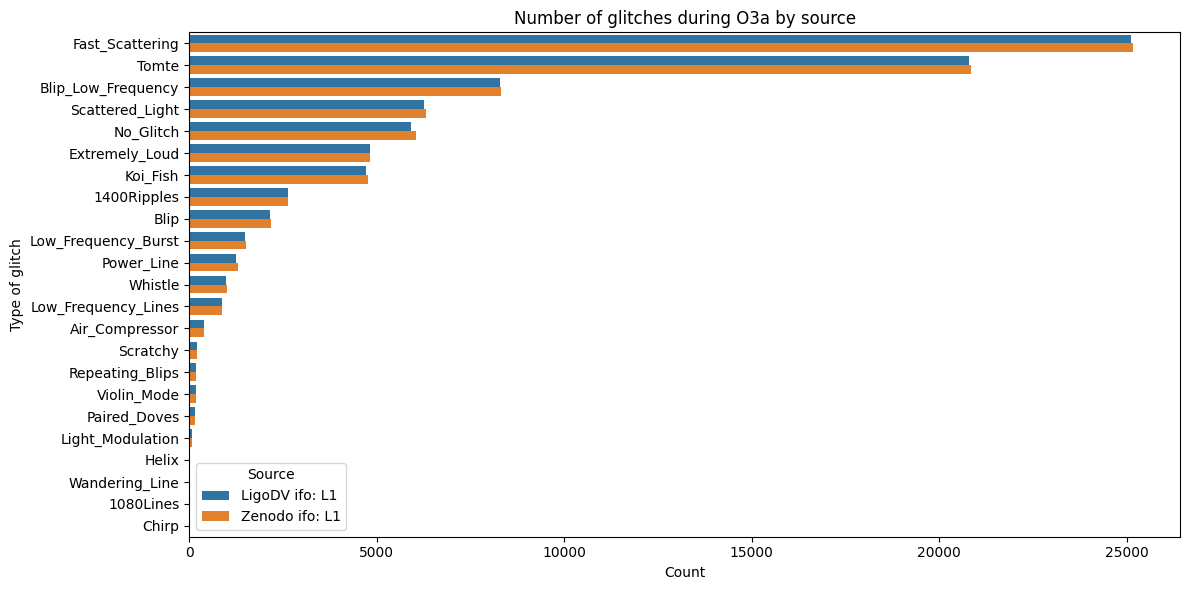

In [26]:
# Adicionando uma origem para cada dataFrame, isso faz com que seja possível
# acessá-los individualmente caso necessário

df2ligo_L1_O3a['Fonte'] = 'LigoDV ifo: L1'
df2zenodo_L1_O3a['Fonte'] = 'Zenodo ifo: L1'

# Mesclagem dos dataframes para o plot em barras
df_combined = pd.concat([df2ligo_L1_O3a, df2zenodo_L1_O3a])

# Esta parte faz a ordem ser pela soma total de ocorrências, ou seja, os glitches
# mais comuns ficam acima dos menos comuns

ordered_labels = (
    df_combined['label']
    .value_counts()
    .loc[lambda x: x.index.isin(df_combined['label'].unique())]
    .index
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_combined,
    y='label',
    hue='Fonte',
    order=ordered_labels,
    dodge=True  # reforça o uso de barras lado a lado
)

plt.title("Number of glitches during O3a by source")
plt.xlabel("Count")
plt.ylabel("Type of glitch")
plt.legend(title='Source')
plt.tight_layout()
plt.show()

And for O3b run too

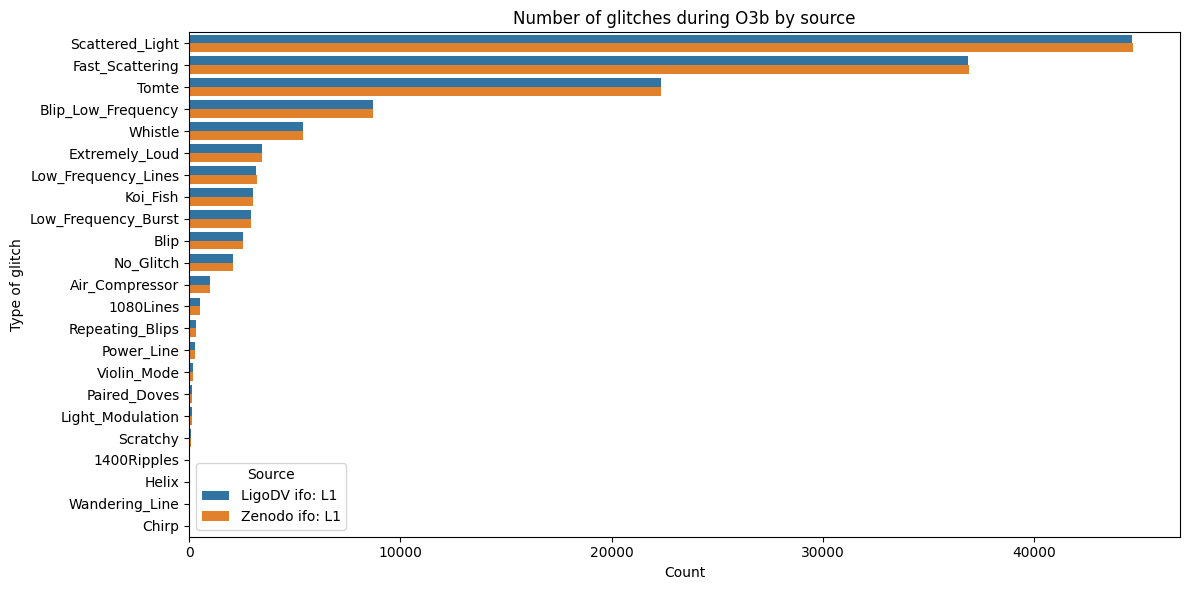

In [28]:
df2ligo_L1_O3b['Fonte'] = 'LigoDV ifo: L1'
df2zenodo_L1_O3b['Fonte'] = 'Zenodo ifo: L1'

df_combined = pd.concat([df2ligo_L1_O3b, df2zenodo_L1_O3b])

ordered_labels = (
    df_combined['label']
    .value_counts()
    .loc[lambda x: x.index.isin(df_combined['label'].unique())]
    .index
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_combined,
    y='label',
    hue='Fonte',
    order=ordered_labels,
    dodge=True  # reforça o uso de barras lado a lado
)

plt.title("Number of glitches during O3b by source")
plt.xlabel("Count")
plt.ylabel("Type of glitch")
plt.legend(title='Source')
plt.tight_layout()
plt.show()

We can see that fast-scattering and scattering-light are the glitches that occurred the most during the O3b run - around November 1st 2019 - March 27th 2020. This agreed with Tabata teses (https://www.gov.br/inpe/pt-br/area-conhecimento/posgraduacao/ast/repositorio-de-arquivos/teses/tese_tabata_aira_ferreira.pdf).

The LIGO website has data from V1 interferometer, let we see

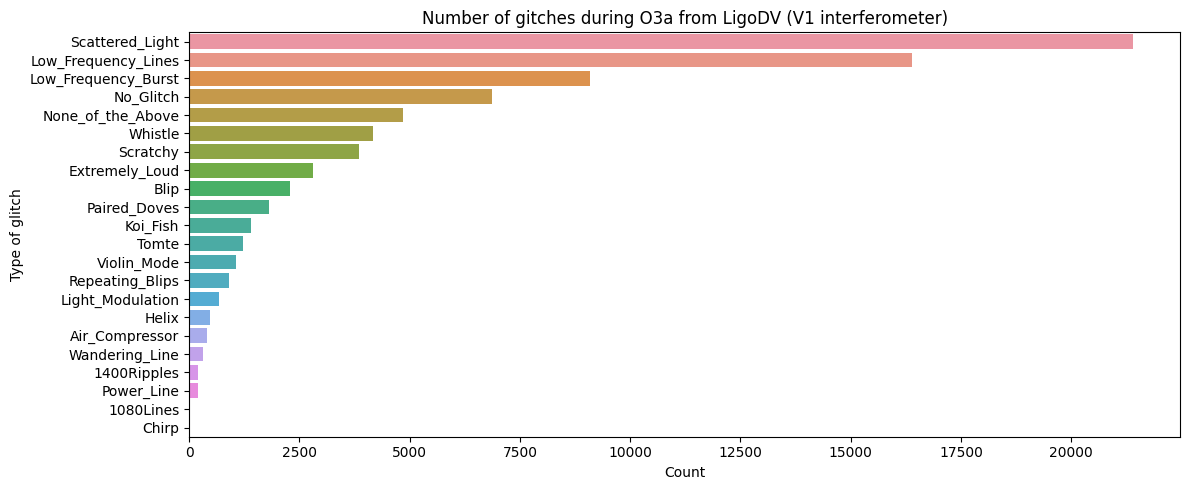

In [30]:
plt.figure(figsize=(12, 5))

sns.countplot(data=df2ligo_V1_O3a, y='label', order=df2ligo_V1_O3a['label'].value_counts().index)
plt.title("Number of gitches during O3a from LigoDV (V1 interferometer)")
plt.xlabel("Count")
plt.ylabel("Type of glitch")

plt.tight_layout()
plt.show()

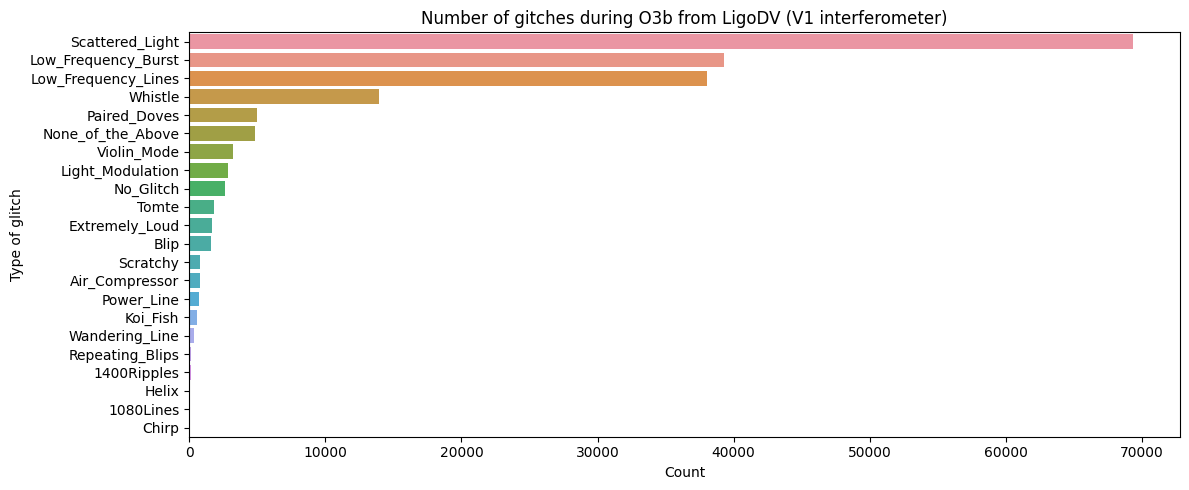

In [31]:
plt.figure(figsize=(12, 5))

sns.countplot(data=df2ligo_V1_O3b, y='label', order=df2ligo_V1_O3b['label'].value_counts().index)
plt.title("Number of gitches during O3b from LigoDV (V1 interferometer)")
plt.xlabel("Count")
plt.ylabel("Type of glitch")

plt.tight_layout()
plt.show()

## Time-tracking of the incidence of each glitch category throughout O3 (monthly, by season, …);

In [33]:
df_sortedO3a = df2ligo_V1_O3a.sort_values(by='GPStime', ascending=True)
df_sortedO3b = df2ligo_V1_O3b.sort_values(by='GPStime', ascending=True)

print(df_sortedO3a.shape)
df_sortedO3a.tail()

(80398, 15)


,GPStime,peakFreq,snr,amplitude,centralFreq,duration,bandwidth,chisq,chisqDof,confidence,id,ifo,label,imgUrl,Q-value
25173,1.253975e+09,19.896,7.619,1.410000e-21,3909.822,1.500,7783.627441,0.0,0.0,0.991,8WQeFNzWf4,V1,Low_Frequency_Lines,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,45.255
57405,1.253975e+09,33.461,12.332,4.140000e-22,3983.241,0.188,7934.482910,0.0,0.0,0.764,489LqPlTZB,V1,None_of_the_Above,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,5.657
48656,1.253977e+09,1198.087,113.390,4.530000e-21,3983.241,1.250,7934.482910,0.0,0.0,0.875,OAdOeIZ59l,V1,Koi_Fish,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,11.314
38962,1.253977e+09,20.168,9.750,1.910000e-21,3983.241,4.748,7934.482910,0.0,0.0,0.951,elTP3iCl5U,V1,Scattered_Light,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627
78415,1.253977e+09,27.344,7.884,4.240000e-22,28.467,0.500,17.425240,0.0,0.0,0.381,xHqb2sOFcV,V1,Paired_Doves,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627


In [34]:
df_Scattered_Light = df_sortedO3a[df_sortedO3a['label'] == 'Scattered_Light']
df_Low_Frequency_Lines = df_sortedO3a[df_sortedO3a['label'] == 'Low_Frequency_Lines']
df_Low_Frequency_Burst = df_sortedO3a[df_sortedO3a['label'] == 'Low_Frequency_Burst']

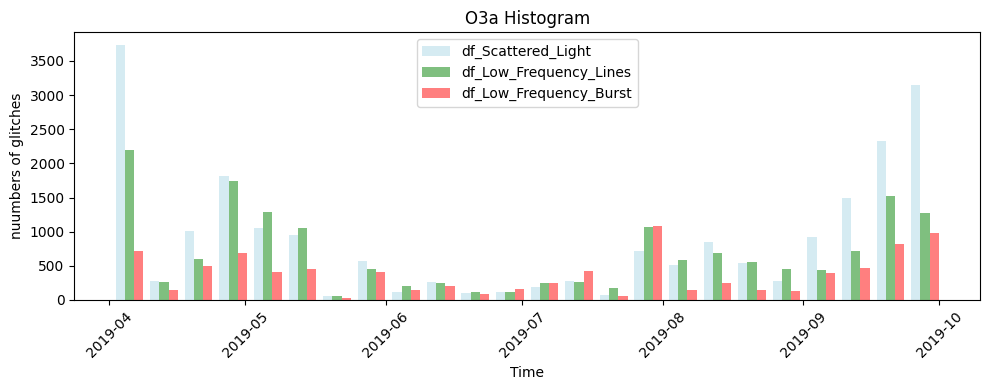

In [35]:
gps_epoch = pd.Timestamp('1980-01-06 00:00:00', tz='UTC')


# df_Scattered_Light['GPStime'] = gps_epoch + pd.to_datetime(df_Scattered_Light['GPStime'], unit='s', origin='unix', errors='coerce')
# df_Low_Frequency_Lines['GPStime'] = gps_epoch + pd.to_datetime(df_Low_Frequency_Lines['GPStime'], unit='s', origin='unix', errors='coerce')
# df_Low_Frequency_Burst['GPStime'] = gps_epoch + pd.to_datetime(df_Low_Frequency_Burst['GPStime'], unit='s', origin='unix', errors='coerce')

df_Scattered_Light['GPStime'] = gps_epoch + pd.to_timedelta(df_Scattered_Light['GPStime'], unit='s')
df_Low_Frequency_Lines['GPStime'] = gps_epoch + pd.to_timedelta(df_Low_Frequency_Lines['GPStime'], unit='s')
df_Low_Frequency_Burst['GPStime'] = gps_epoch + pd.to_timedelta(df_Low_Frequency_Burst['GPStime'], unit='s')

# Histograma dos 'n' glitches escolhidos
plt.figure(figsize=(10,4))

plt.hist([df_Scattered_Light['GPStime'], df_Low_Frequency_Lines['GPStime'], df_Low_Frequency_Burst['GPStime']], 
         bins=24,
         label = ['df_Scattered_Light', 'df_Low_Frequency_Lines', 'df_Low_Frequency_Burst'],
         color=['lightblue', 'green', 'red'], alpha=0.5)

# Eixo x em medida temporal (a variável "bins" modifica o período a ser visualizado)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("nuumbers of glitches")
plt.title("O3a Histogram")

plt.legend()
plt.tight_layout()
plt.show()

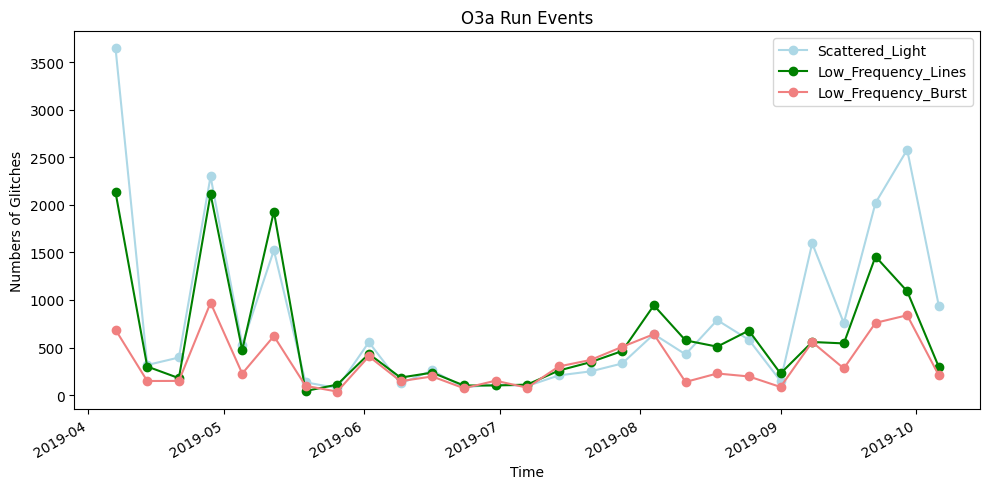

In [36]:
df_Scattered_Light['datetime'] = pd.to_datetime(df_Scattered_Light['GPStime'], unit='s')
df_Scattered_Light.set_index('datetime', inplace=True)

df_Low_Frequency_Lines['datetime'] = pd.to_datetime(df_Low_Frequency_Lines['GPStime'], unit='s')
df_Low_Frequency_Lines.set_index('datetime', inplace=True)

df_Low_Frequency_Burst['datetime'] = pd.to_datetime(df_Low_Frequency_Burst['GPStime'], unit='s')
df_Low_Frequency_Burst.set_index('datetime', inplace=True)

mensal_1 = df_Scattered_Light.resample('w').size()
mensal_2 = df_Low_Frequency_Lines.resample('w').size()
mensal_3 = df_Low_Frequency_Burst.resample('w').size()

plt.figure(figsize=(10,5))
plt.plot(mensal_1.index, mensal_1.values, marker='o', color='lightblue', linestyle='-', label='Scattered_Light')
plt.plot(mensal_2.index, mensal_2.values, marker='o', color='green', linestyle='-', label='Low_Frequency_Lines')
plt.plot(mensal_3.index, mensal_3.values, marker='o', color='lightcoral', linestyle='-', label='Low_Frequency_Burst')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Numbers of Glitches')
plt.title('O3a Run Events')

plt.legend()
plt.tight_layout()
plt.show()

## Funções para plots em linha

In [71]:
# função de chamada para os glitches

glitches_number, glitches_chosen, time_key = ff.call_function()

glitches_number = Quantos glithes você quer escolher?  4

Digite o glitch 1:  Scattered_Light

Digite o glitch 2:  Low_Frequency_Lines

Digite o glitch 3:  Low_Frequency_Burst

Digite o glitch 4:  Blip



['Scattered_Light', 'Low_Frequency_Lines', 'Low_Frequency_Burst', 'Blip']



Digite a letra correspondente do eixo x: 
 'd' for 'daily',
 'w' for 'weekly',
 'm' for 'monthly',
 'q' for 'quarterly',
 '2q' for 'half-yearly',
 'y' for 'annual'
 m


In [73]:
# função para analisar dependencias nos inputs
ff.inputs_dependences(df_sortedO3a, glitches_number, glitches_chosen, time_key)

Todos os nomes escolhidos são válidos!


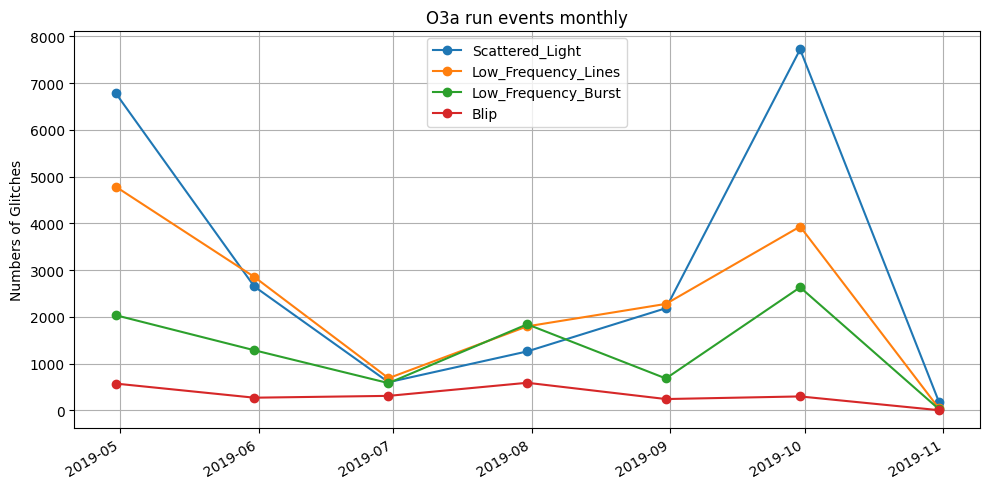

In [75]:
ff.plot_function(df_sortedO3a, glitches_number, glitches_chosen, time_key)

In [ ]:
apr = Time('2019-04-01T00:00:00', format='isot', scale='utc').gps
may = Time('2019-05-01T00:00:00', format='isot', scale='utc').gps
jun = Time('2019-06-01T00:00:00', format='isot', scale='utc').gps
jul = Time('2019-07-01T00:00:00', format='isot', scale='utc').gps
aug = Time('2019-08-01T00:00:00', format='isot', scale='utc').gps
sep = Time('2019-09-01T00:00:00', format='isot', scale='utc').gps
oct = Time('2019-10-01T00:00:00', format='isot', scale='utc').gps

nov = Time('2019-11-01T00:00:00', format='isot', scale='utc').gps
dez = Time('2019-12-01T00:00:00', format='isot', scale='utc').gps
jan = Time('2020-01-01T00:00:00', format='isot', scale='utc').gps
feb = Time('2020-02-01T00:00:00', format='isot', scale='utc').gps
mar = Time('2020-03-01T00:00:00', format='isot', scale='utc').gps
mar27 = Time('2020-03-27T00:00:00', format='isot', scale='utc').gps

In [ ]:
O3a_apr = df_sortedO3a[(df_sortedO3a['GPStime'] >= apr) & (df_sortedO3a['GPStime'] < may)]
O3a_may = df_sortedO3a[(df_sortedO3a['GPStime'] >= may) & (df_sortedO3a['GPStime'] < jun)]
O3a_jne = df_sortedO3a[(df_sortedO3a['GPStime'] >= jun) & (df_sortedO3a['GPStime'] < jul)]
O3a_jul = df_sortedO3a[(df_sortedO3a['GPStime'] >= jul) & (df_sortedO3a['GPStime'] < aug)]
O3a_aug = df_sortedO3a[(df_sortedO3a['GPStime'] >= aug) & (df_sortedO3a['GPStime'] < sep)]
O3a_sep = df_sortedO3a[(df_sortedO3a['GPStime'] >= sep) & (df_sortedO3a['GPStime'] < oct)]

O3b_nov = df_sortedO3b[(df_sortedO3b['GPStime'] >= nov) & (df_sortedO3b['GPStime'] < dez)]
O3b_dez = df_sortedO3b[(df_sortedO3b['GPStime'] >= dez) & (df_sortedO3b['GPStime'] < jan)]
O3b_jan = df_sortedO3b[(df_sortedO3b['GPStime'] >= jan) & (df_sortedO3b['GPStime'] < feb)]
O3b_feb = df_sortedO3b[(df_sortedO3b['GPStime'] >= feb) & (df_sortedO3b['GPStime'] < mar)]
O3b_mar = df_sortedO3b[(df_sortedO3b['GPStime'] >= mar) & (df_sortedO3b['GPStime'] < mar27)]

In [ ]:
O3a_apr['Fonte'] = 'april'
O3a_jne['Fonte'] = 'june'
O3a_sep['Fonte'] = 'sep'

df_combined = pd.concat([O3a_apr, O3a_jne, O3a_jne, O3a_sep])

ordered_labels = (
    df_combined['label']
    .value_counts()
    .loc[lambda x: x.index.isin(df_combined['label'].unique())]
    .index
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_combined,
    y='label',
    hue='Fonte',
    order=ordered_labels,
    dodge=True  # reforça o uso de barras lado a lado
)

plt.title("Number of glitches during O3a run by month (ifo: V1)")
plt.xlabel("Count")
plt.ylabel("Type of glitch")
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [ ]:
O3b_nov['Fonte'] = 'november'
O3b_jan['Fonte'] = 'january'
O3b_mar['Fonte'] = 'march'

df_combined = pd.concat([O3b_nov, O3b_jan, O3b_mar])

ordered_labels = (
    df_combined['label']
    .value_counts()
    .loc[lambda x: x.index.isin(df_combined['label'].unique())]
    .index
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_combined,
    y='label',
    hue='Fonte',
    order=ordered_labels,
    dodge=True  # reforça o uso de barras lado a lado
)

plt.title("Number of glitches during O3b run by month (ifo: V1)")
plt.xlabel("Count")
plt.ylabel("Type of glitch")
plt.legend(title='Month')
plt.tight_layout()
plt.show()